In [27]:
import pandas as pd
import numpy as np 
from text_analytics import * 
import matplotlib.pyplot as plt 
import warnings
from functools import *
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('../Data/cleaned.csv')
data.head()

,SupportTicketID,CustomerID,DateCreated,DateCompleted,Escalated,Theme,Theme_Desc,Text,Sentiment,Process Time
0,16582,10007217,2018-06-30,2018-04-07,1,price,cost of the goods to customers. compare to co...,A screwdriver costs over a hundred dollars? Wh...,negative,2.0
1,13830,10005984,2018-07-15,2018-07-18,0,speed,consider the delivery speed.,Anyway that I can rush overnight ship my order?,neutral,3.0
2,53794,10022738,2018-10-14,2018-10-18,0,features,"product features, website features, checkout f...",Are the shelves removable from the wine fridge...,neutral,4.0
3,95013,10040142,2018-01-11,2018-10-11,0,price,cost of the goods to customers. compare to co...,Are there any Christmas sales coming up?,neutral,273.0
4,32660,10013924,2018-06-06,2018-06-06,1,design,"product design, website design",Are there any other colors in the bathroom sin...,neutral,0.0


In [11]:
inputData = data[['Text']].rename(columns = {'Text':'text'})
inputData['language'] = ['en' for i in range(len(inputData))]
inputData['id'] = [i for i in np.arange(1, len(inputData) + 1)]
inputData

,text,language,id
0,A screwdriver costs over a hundred dollars? Wh...,en,1
1,Anyway that I can rush overnight ship my order?,en,2
2,Are the shelves removable from the wine fridge...,en,3
3,Are there any Christmas sales coming up?,en,4
4,Are there any other colors in the bathroom sin...,en,5
...,...,...,...
322,your website doesn't have all of the inventory...,en,323
323,Your website is super glitchy. It won't let me...,en,324
324,Your website keeps crashing and forgetting eve...,en,325
325,Your website keeps crashing on mobile. It sucks.,en,326


In [12]:
import json
def api_call(text, language, id):
    document_value = [{'text':text, 'language':language, 'id':id}]
    SPD_API_DICT = {'documents':document_value}
    return_value = extract_key_phrases(SPD_API_DICT)
    return return_value['documents'][0]['keyPhrases']

In [13]:
inputData['keywords'] = inputData.apply(lambda x: api_call(x['text'], x['language'], x['id']), axis = 1)
inputData

Printing key phrases ... 

Printing key phrases ... 

Printing key phrases ... 

Printing key phrases ... 

Printing key phrases ... 

Printing key phrases ... 

Printing key phrases ... 

Printing key phrases ... 

Printing key phrases ... 

Printing key phrases ... 

Printing key phrases ... 

Printing key phrases ... 

Printing key phrases ... 

Printing key phrases ... 

Printing key phrases ... 

Printing key phrases ... 

Printing key phrases ... 

Printing key phrases ... 

Printing key phrases ... 

Printing key phrases ... 

Printing key phrases ... 

Printing key phrases ... 

Printing key phrases ... 

Printing key phrases ... 

Printing key phrases ... 

Printing key phrases ... 

Printing key phrases ... 

Printing key phrases ... 

Printing key phrases ... 

Printing key phrases ... 

Printing key phrases ... 

Printing key phrases ... 

Printing key phrases ... 

Printing key phrases ... 

Printing key phrases ... 

Printing key phrases ... 

Printing key phrases ... 

P

Printing key phrases ... 

Printing key phrases ... 

Printing key phrases ... 

Printing key phrases ... 

Printing key phrases ... 

Printing key phrases ... 

Printing key phrases ... 

Printing key phrases ... 

Printing key phrases ... 

Printing key phrases ... 

Printing key phrases ... 

Printing key phrases ... 

Printing key phrases ... 

Printing key phrases ... 

Printing key phrases ... 

Printing key phrases ... 

Printing key phrases ... 

Printing key phrases ... 

Printing key phrases ... 

Printing key phrases ... 

Printing key phrases ... 

Printing key phrases ... 

Printing key phrases ... 

Printing key phrases ... 



,text,language,id,keywords
0,A screwdriver costs over a hundred dollars? Wh...,en,1,"[screwdriver costs, dollars, prices]"
1,Anyway that I can rush overnight ship my order?,en,2,[order]
2,Are the shelves removable from the wine fridge...,en,3,"[shelves removable, wine fridge, bottles]"
3,Are there any Christmas sales coming up?,en,4,[Christmas sales]
4,Are there any other colors in the bathroom sin...,en,5,"[colors, bathroom sink faucet]"
...,...,...,...,...
322,your website doesn't have all of the inventory...,en,323,"[website, inventory, everytime]"
323,Your website is super glitchy. It won't let me...,en,324,"[website, super glitchy, order]"
324,Your website keeps crashing and forgetting eve...,en,325,"[website, cart]"
325,Your website keeps crashing on mobile. It sucks.,en,326,[website]


#### EDA of most common keywords and their respective process times. \

In [14]:
data['Keywords'] = inputData['keywords']
data.head()

,SupportTicketID,CustomerID,DateCreated,DateCompleted,Escalated,Theme,Theme_Desc,Text,Sentiment,Process Time,Keywords
0,16582,10007217,2018-06-30,2018-04-07,1,price,cost of the goods to customers. compare to co...,A screwdriver costs over a hundred dollars? Wh...,negative,2.0,"[screwdriver costs, dollars, prices]"
1,13830,10005984,2018-07-15,2018-07-18,0,speed,consider the delivery speed.,Anyway that I can rush overnight ship my order?,neutral,3.0,[order]
2,53794,10022738,2018-10-14,2018-10-18,0,features,"product features, website features, checkout f...",Are the shelves removable from the wine fridge...,neutral,4.0,"[shelves removable, wine fridge, bottles]"
3,95013,10040142,2018-01-11,2018-10-11,0,price,cost of the goods to customers. compare to co...,Are there any Christmas sales coming up?,neutral,273.0,[Christmas sales]
4,32660,10013924,2018-06-06,2018-06-06,1,design,"product design, website design",Are there any other colors in the bathroom sin...,neutral,0.0,"[colors, bathroom sink faucet]"


In [10]:
extract_key_phrases(convert_text_to_JSON(data['Text'][15]))['documents'][0]['keyPhrases']

Printing key phrases ... 



['credit cards', 'account']

#### Lowest/highest process times and their keywords

{1, 2, 3}

In [32]:
data['Keywords'] = [list(x) for x in data['Keywords']]
data.head()

,SupportTicketID,CustomerID,DateCreated,DateCompleted,Escalated,Theme,Theme_Desc,Text,Sentiment,Process Time,Keywords
0,16582,10007217,2018-06-30,2018-04-07,1,price,cost of the goods to customers. compare to co...,A screwdriver costs over a hundred dollars? Wh...,negative,2.0,"[screwdriver costs, dollars, prices]"
1,13830,10005984,2018-07-15,2018-07-18,0,speed,consider the delivery speed.,Anyway that I can rush overnight ship my order?,neutral,3.0,[order]
2,53794,10022738,2018-10-14,2018-10-18,0,features,"product features, website features, checkout f...",Are the shelves removable from the wine fridge...,neutral,4.0,"[shelves removable, wine fridge, bottles]"
3,95013,10040142,2018-01-11,2018-10-11,0,price,cost of the goods to customers. compare to co...,Are there any Christmas sales coming up?,neutral,273.0,[Christmas sales]
4,32660,10013924,2018-06-06,2018-06-06,1,design,"product design, website design",Are there any other colors in the bathroom sin...,neutral,0.0,"[bathroom sink faucet, colors]"


In [33]:
from operator import add

In [35]:
temp = data.sort_values('Process Time', ascending = False).groupby('Theme').aggregate(lambda x: reduce(add, x))
temp

,SupportTicketID,CustomerID,DateCreated,DateCompleted,Escalated,Theme_Desc,Text,Sentiment,Process Time,Keywords
Theme,,,,,,,,,,
design,737958,180313223,2018-10-102018-08-222018-07-312018-08-302018-0...,2018-11-102018-08-282018-04-082018-05-092018-0...,2,"product design, website designproduct design, ...",The hammer I purchased is supposed to be ergon...,negativenegativenegativeneutralpositivepositiv...,74.384615,"[refund, false advertising, hammer, color, don..."
features,2499198,491033218,2018-01-122018-05-062018-04-112018-06-072018-0...,2018-10-122018-09-062018-08-112018-10-072018-0...,4,"product features, website features, checkout f...",I wish there was a way to cancel my order afte...,negativeneutralneutralpositivenegativeneutraln...,1452.225225,"[checkout, order, way, certain product, search..."
other,681682,130277142,2018-06-082018-01-092018-10-062018-12-062018-0...,2018-12-082018-05-092018-06-192018-06-202018-0...,4,Just make up something!Just make up something!...,This app is buggy.My mom said she hated the cu...,negativenegativemixednegativepositivenegativep...,501.142857,"[app, curtains, mom, wrong product, right1, pl..."
price,2629385,591094591,2018-01-112018-03-062018-04-092018-03-062018-0...,2018-10-112018-11-062018-10-092018-08-062018-1...,4,cost of the goods to customers. compare to co...,Are there any Christmas sales coming up?The pr...,neutralpositivenegativeneutralneutralnegativen...,2084.555556,"[Christmas sales, local businesses, Tailwind T..."
reliability,1935959,310794199,2018-04-072018-05-112018-04-092018-04-072018-0...,2018-11-072018-11-112018-10-092018-10-072018-0...,5,"product reliability, website reliability, deli...",The kitchen sink faucet only turns on half the...,negativeneutralpositivenegativenegativenegativ...,1541.083333,"[kitchen sink faucet, installation folks, tech..."
security,1813986,260722500,2018-05-102018-07-052018-06-102018-04-092018-0...,2018-11-102018-11-052018-10-102018-08-092018-0...,4,"consider payment info, login info and pii.cons...",I'm locked out of my account but don't know wh...,neutralmixednegativenegativeneutralneutralnega...,1150.352941,"[account, account password, link, reason, emai..."
services,1636416,340682453,2018-02-112018-01-092018-07-112018-07-102018-1...,2018-11-112018-06-092018-11-132018-11-102018-1...,5,"delivery services, installation services, acco...",I've been waiting ages for my laptop to arrive...,neutralneutralneutralnegativenegativeneutralne...,931.464286,"[ages, laptop, work, point, screen, order, che..."
speed,4325976,761772067,2018-01-102018-05-052018-06-052018-05-082018-0...,2018-08-102018-11-052018-12-052018-09-082018-1...,10,consider the delivery speed.consider the deliv...,My products still have not arrived. What is t...,neutralneutralnegativenegativenegativenegative...,2298.625000,"[app, week, products, chance, order, website, ..."
support,1299992,210534908,2018-05-092018-05-112018-10-092018-02-072018-0...,2018-12-092018-09-112018-11-092018-03-072018-0...,2,"tech support, customer support, product suppor...",Do you have 24/7 customer service provided?Do ...,neutralneutralnegativenegativeneutralpositivep...,512.250000,"[customer service, installations, home, video ..."


In [38]:


wordlist = temp['Keywords'][0]

wordfreq = []
for w in wordlist:
    wordfreq.append(wordlist.count(w))

print("List\n" + str(wordlist) + "\n")
print("Frequencies\n" + str(wordfreq) + "\n")
#print("Pairs\n" + str(list(zip(wordlist, wordfreq))))
sorted(zip(wordlist, wordfreq), key = lambda x: x[1])

List
['refund', 'false advertising', 'hammer', 'color', 'donít', 'unit', 'kind of devices', 'wrong design choice', 'kitchen tables', 'brands', 'dining table', 'quality', 'tray', 'house', 'height', 'design', 'unit', 'stuff', 'designer', 'start', 'website', 'website', 'coupons', 'road', 'wheels', 'wheelbarrow', 'earth', 'curtain rod', 'ends', 'curtains', 'piece of trash', 'order', 'soooo confusing', 'layout', 'head', 'design', 'attachment', 'shovel', 'week', 'unit', 'time', 'functions', 'website', 'certain product', 'different colors', 'website', 'device', 'guys', 'design variation', 'handle', 'dud', 'shovel', 'capacity', 'space', 'cabinet', 'left', 'design decision', 'holders', 'bathroom sink faucet', 'colors', 'bad design decision', 'place everytime', 'unit', 'button']

Frequencies
[1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 4, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1]



[('refund', 1),
 ('false advertising', 1),
 ('hammer', 1),
 ('color', 1),
 ('donít', 1),
 ('kind of devices', 1),
 ('wrong design choice', 1),
 ('kitchen tables', 1),
 ('brands', 1),
 ('dining table', 1),
 ('quality', 1),
 ('tray', 1),
 ('house', 1),
 ('height', 1),
 ('stuff', 1),
 ('designer', 1),
 ('start', 1),
 ('coupons', 1),
 ('road', 1),
 ('wheels', 1),
 ('wheelbarrow', 1),
 ('earth', 1),
 ('curtain rod', 1),
 ('ends', 1),
 ('curtains', 1),
 ('piece of trash', 1),
 ('order', 1),
 ('soooo confusing', 1),
 ('layout', 1),
 ('head', 1),
 ('attachment', 1),
 ('week', 1),
 ('time', 1),
 ('functions', 1),
 ('certain product', 1),
 ('different colors', 1),
 ('device', 1),
 ('guys', 1),
 ('design variation', 1),
 ('handle', 1),
 ('dud', 1),
 ('capacity', 1),
 ('space', 1),
 ('cabinet', 1),
 ('left', 1),
 ('design decision', 1),
 ('holders', 1),
 ('bathroom sink faucet', 1),
 ('colors', 1),
 ('bad design decision', 1),
 ('place everytime', 1),
 ('button', 1),
 ('design', 2),
 ('design', 2)

In [43]:
!pip install wordcloud


In [54]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


#### design

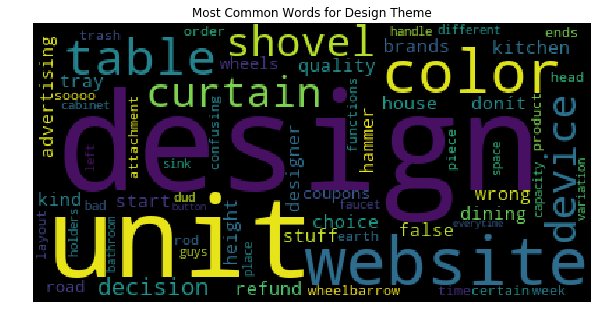

In [82]:
cloud = WordCloud()
cloud.generate(" ".join(temp.loc['design', :]['Keywords']))
plt.figure(figsize = (10, 8))
plt.title('Most Common Words for Design Theme')
plt.axis("off")
plt.imshow(cloud);

#### features

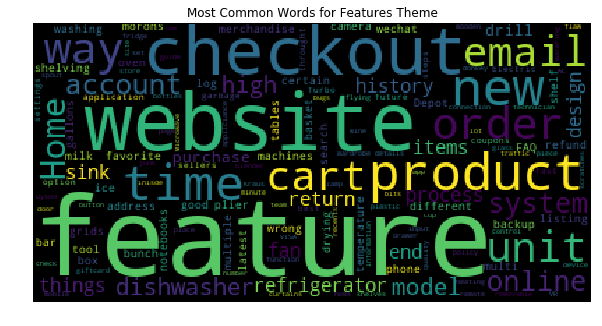

In [83]:
cloud = WordCloud()
cloud.generate(" ".join(temp.loc['features', :]['Keywords']))
plt.figure(figsize = (10, 8))
plt.title('Most Common Words for Features Theme')
plt.axis("off")
plt.imshow(cloud);

#### price

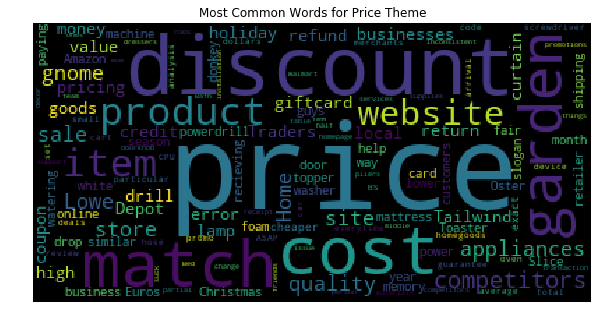

In [84]:
cloud = WordCloud()
cloud.generate(" ".join(temp.loc['price', :]['Keywords']))
plt.figure(figsize = (10, 8))
plt.title('Most Common Words for Price Theme')
plt.axis("off")
plt.imshow(cloud);

#### reliability


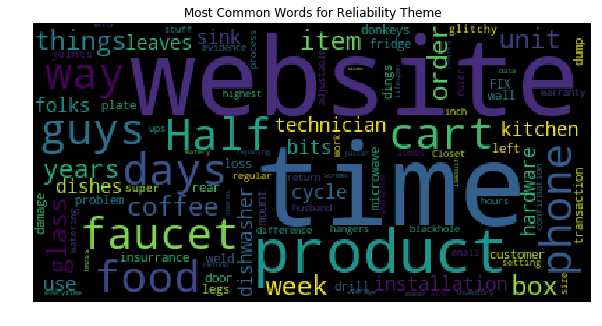

In [85]:
cloud = WordCloud()
cloud.generate(" ".join(temp.loc['reliability', :]['Keywords']))
plt.figure(figsize = (10, 8))
plt.title('Most Common Words for Reliability Theme')
plt.axis("off")
plt.imshow(cloud);

#### support

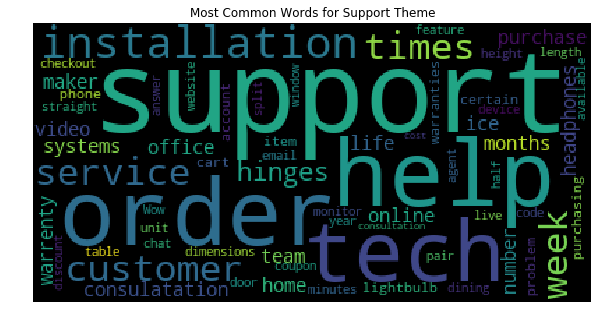

In [86]:
cloud = WordCloud()
cloud.generate(" ".join(temp.loc['support', :]['Keywords']))
plt.figure(figsize = (10, 8))
plt.title('Most Common Words for Support Theme')
plt.axis("off")
plt.imshow(cloud);

#### security

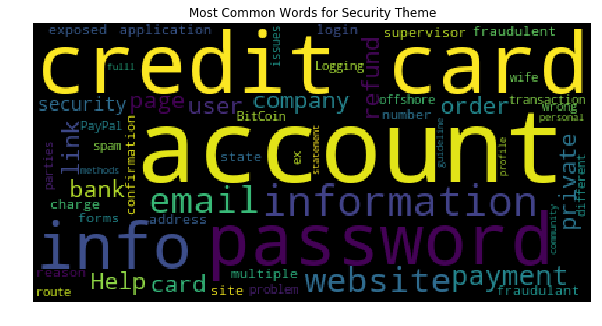

In [87]:
cloud = WordCloud()
cloud.generate(" ".join(temp.loc['security', :]['Keywords']))
plt.figure(figsize = (10, 8))
plt.title('Most Common Words for Security Theme')
plt.axis("off")
plt.imshow(cloud);

#### services

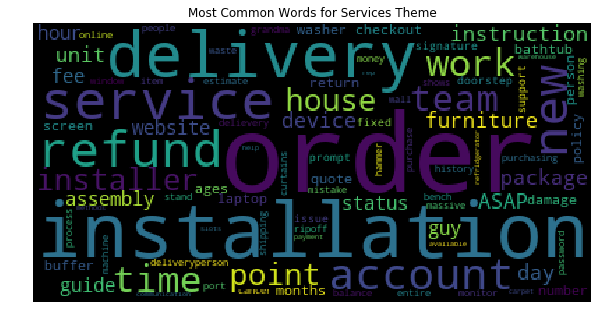

In [88]:
cloud = WordCloud()
cloud.generate(" ".join(temp.loc['services', :]['Keywords']))
plt.figure(figsize = (10, 8))
plt.title('Most Common Words for Services Theme')
plt.axis("off")
plt.imshow(cloud);

#### speed

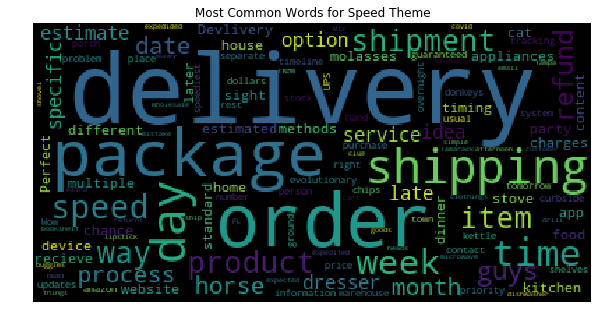

In [89]:
cloud = WordCloud()
cloud.generate(" ".join(temp.loc['speed', :]['Keywords']))
plt.figure(figsize = (10, 8))
plt.title('Most Common Words for Speed Theme')
plt.axis("off")
plt.imshow(cloud);

#### other

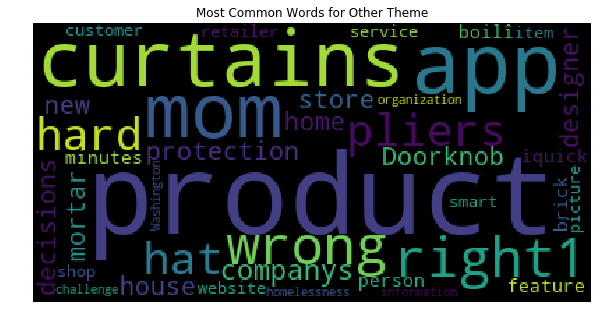

In [90]:
cloud = WordCloud()
cloud.generate(" ".join(temp.loc['other', :]['Keywords']))
plt.figure(figsize = (10, 8))
plt.title('Most Common Words for Other Theme')
plt.axis("off")
plt.imshow(cloud);